# 利用decision tree 預測學生會不會及格
資料的attribute有:
- 總共上課次數 (course_time)
- 每週讀書時間 (study_hour)
- 是否有做作業 (do_homework)
- 是否有補習 (tutoring)
- 小考成績 (test_score)
- 是否通過考試 (pass)



當資料較複雜時，model出來的decision tree和原本的rule長的非常不一樣，雖然用訓練資料可以model 出100％準確率的tree，但放入其他比資料驗證會有錯誤資料，解釋decision tree錯誤解讀部份的attribute

In [1]:
# include package
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.metrics import accuracy_score #計算準確度
import random

# 設計自己的decision tree rule (simple)

較簡單規則的decision tree,並用這棵decision tree以亂數的方式生產 data

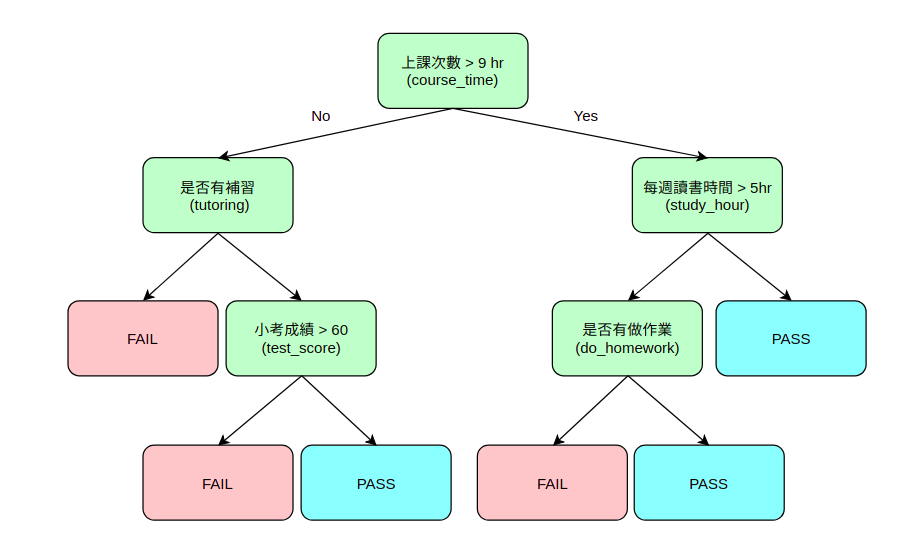

In [2]:
# make a table with num rows.
def make_table_simple(num):
    pd_data = pd.DataFrame(columns=['course_time', 'study_hour', 'do_homework', 'tutoring', 'test_score', 'pass'])
    for i in range(1000):
        pd_data.loc[i, 'course_time'] = random.randint(0, 18)
        pd_data.loc[i, 'study_hour'] = random.randint(0, 10)
        pd_data.loc[i, 'do_homework'] = random.randint(0, 1)
        pd_data.loc[i, 'tutoring'] = random.randint(0, 1)
        pd_data.loc[i, 'test_score'] = random.randint(0, 100)
    
        if pd_data.loc[i, 'course_time'] > 9:
            if pd_data.loc[i, 'study_hour'] > 5:
                pd_data.loc[i, 'pass'] = 1
            
            else:
                if pd_data.loc[i, 'do_homework'] == 1:
                    pd_data.loc[i, 'pass'] = 1
                
                else:
                    pd_data.loc[i, 'pass'] = 0
    
        else:
            if pd_data.loc[i, 'tutoring'] == 1:
                if pd_data.loc[i, 'test_score'] > 60:
                    pd_data.loc[i, 'pass'] = 1
                
                else:
                    pd_data.loc[i, 'pass'] = 0
                
            else: 
                pd_data.loc[i, 'pass'] = 0
    
    return pd_data

In [ ]:
# 產生資料
train_data_simple = make_table_simple(9000)
test_data_simple = make_table_simple(2000)

train_data_simple.head()

In [ ]:
# 將input和預測的output data分開
train_x_simple = train_data_simple.drop(['pass'], axis=1)
train_y_simple = train_data_simple['pass'].values
test_x_simple = test_data_simple.drop(['pass'], axis=1)
test_y_simple = test_data_simple['pass'].values

In [ ]:
# 利用資料訓練decision tree
dtree_simple = DecisionTreeClassifier(max_depth=4)
dtree_simple.fit(train_x_simple, train_y_simple)

dot_data = StringIO()

# 畫出decision tree
export_graphviz(dtree_simple,
    out_file=dot_data,
    filled=True,
    feature_names=list(train_x_simple),
    class_names=['fail', 'pass'],
    special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_pdf('decision_tree_simple.pdf')

# fit 出來的decision tree

在分類規則較簡單的時候，可以看出model出來的decision tree，和原先的規則差不了多少，只是有些決策順序不同。

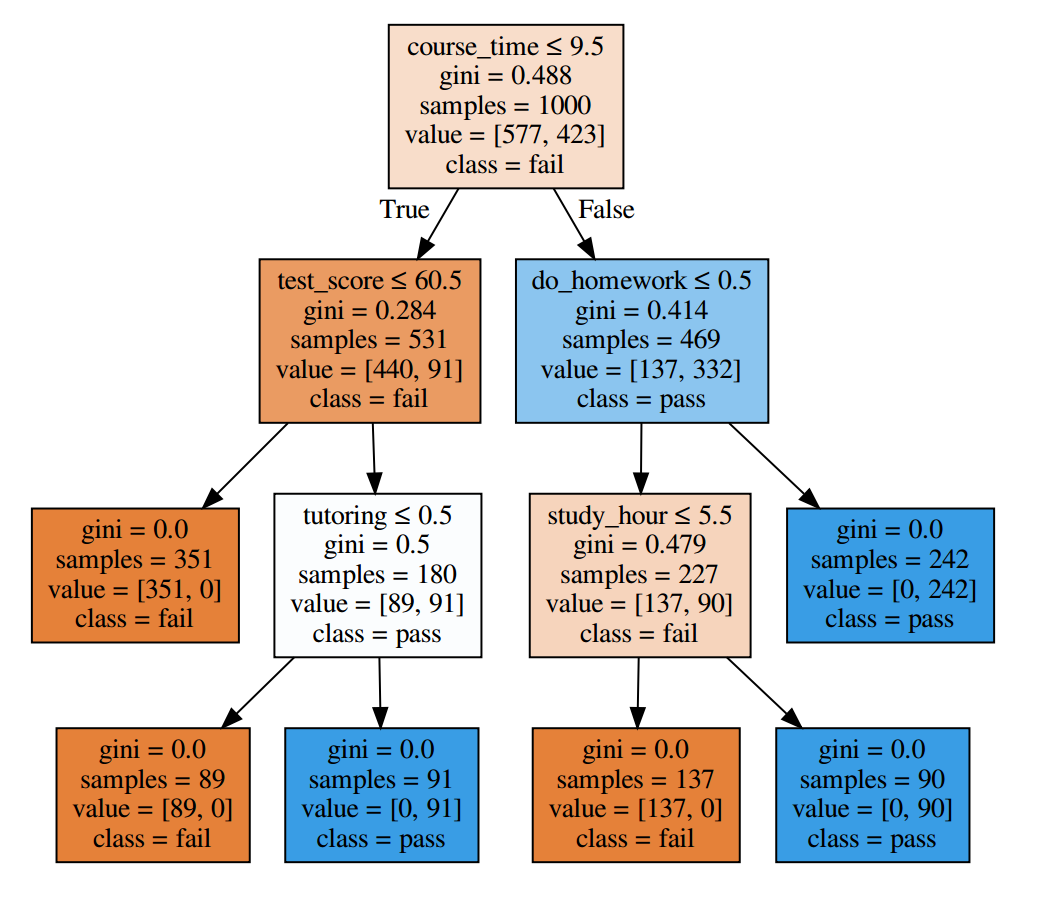

# 利用其他比資料驗證準確率
rule較簡單時，100準確率為％

In [ ]:
# 利用decision tree 預測
dt_predict = dtree_simple.predict(test_x_simple)
accuracy_score(dt_predict, test_y_simple)

# 較複雜的rule，有些attribute無法一刀切割

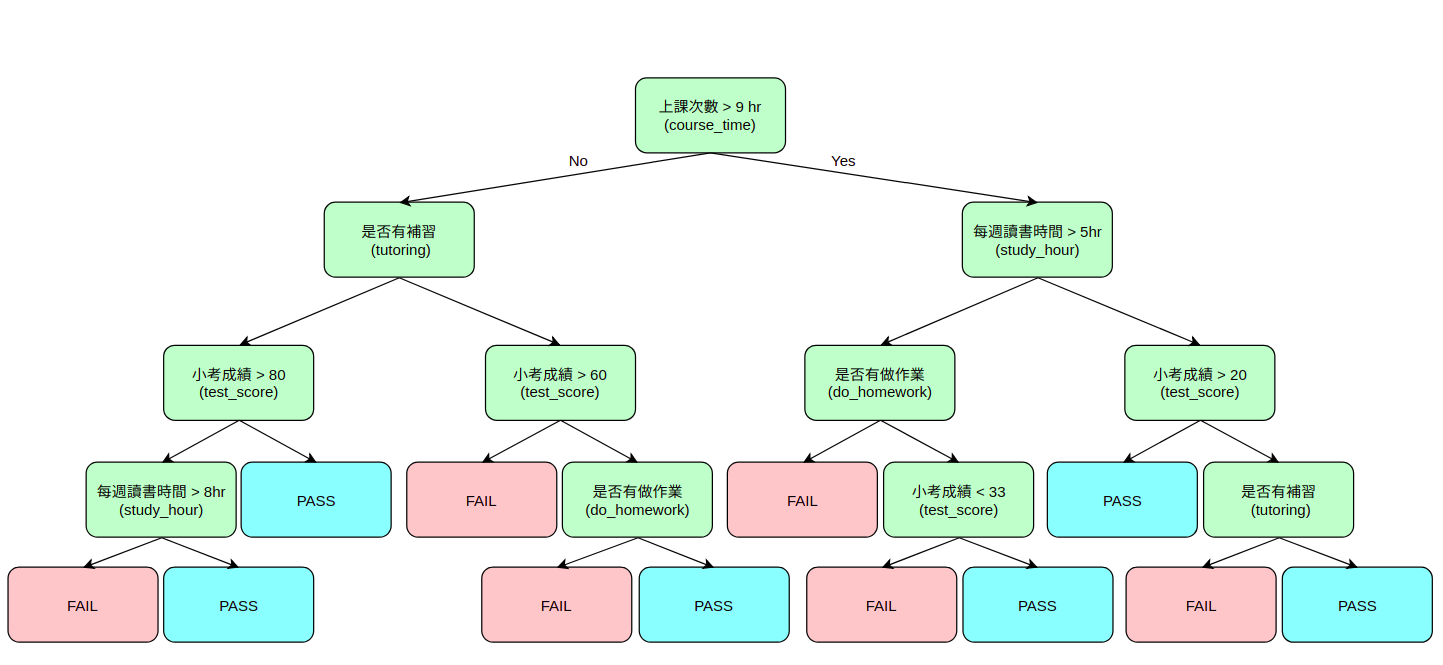

In [ ]:
# make a table with num rows.
def make_table_complicate(num):
    pd_data = pd.DataFrame(columns=['course_time', 'study_hour', 'do_homework', 'tutoring', 'test_score', 'pass'])
    for i in range(1000):
        pd_data.loc[i, 'course_time'] = random.randint(0, 18)
        pd_data.loc[i, 'study_hour'] = random.randint(0, 10)
        pd_data.loc[i, 'do_homework'] = random.randint(0, 1)
        pd_data.loc[i, 'tutoring'] = random.randint(0, 1)
        pd_data.loc[i, 'test_score'] = random.randint(0, 100)
    
        if pd_data.loc[i, 'course_time'] > 9:
            if pd_data.loc[i, 'study_hour'] > 5:
                if pd_data.loc[i, 'test_score'] > 20:
                    if pd_data.loc[i, 'tutoring'] == 1:
                        pd_data.loc[i, 'pass'] = 1
                    else:
                        pd_data.loc[i, 'pass'] = 1
                        
                else:
                    pd_data.loc[i, 'pass'] = 0
                    
            else:
                if pd_data.loc[i, 'do_homework'] == 1:
                    if pd_data.loc[i, 'test_score'] < 33:
                        pd_data.loc[i, 'pass'] = 0
                    else:
                        pd_data.loc[i, 'pass'] = 1
                
                else:
                    pd_data.loc[i, 'pass'] = 0
    
        else:
            if pd_data.loc[i, 'tutoring'] == 1:
                if pd_data.loc[i, 'test_score'] > 60:
                    if pd_data.loc[i, 'do_homework'] == 1:
                        pd_data.loc[i, 'pass'] = 1
                    else:
                        pd_data.loc[i, 'pass'] = 0
                
                else:
                    pd_data.loc[i, 'pass'] = 0
                
            else: 
                if pd_data.loc[i, 'test_score'] > 80:
                    pd_data.loc[i, 'pass'] = 1
                else:
                    if pd_data.loc[i, 'study_hour'] > 8:
                        pd_data.loc[i, 'pass'] = 1
                    else:
                        pd_data.loc[i, 'pass'] = 0
    return pd_data

In [ ]:
# 產生資料
train_data_complicate = make_table_complicate(10000)
test_data_complicate = make_table_complicate(10000)

train_data_complicate.head()

In [ ]:
# 將input和預測的output data分開
train_x_complicate = train_data_complicate.drop(['pass'], axis=1)
train_y_complicate = train_data_complicate['pass'].values
test_x_complicate = test_data_complicate.drop(['pass'], axis=1)
test_y_complicate = test_data_complicate['pass'].values

# model 出來的decision tree

當資料較複雜時，model出來的decision tree和原本的rule長的非常不一樣，雖然用訓練資料可以model 出100％準確率的tree，但放入其他比資料驗證會有錯誤資料，解釋decision tree錯誤解讀部份的attribute


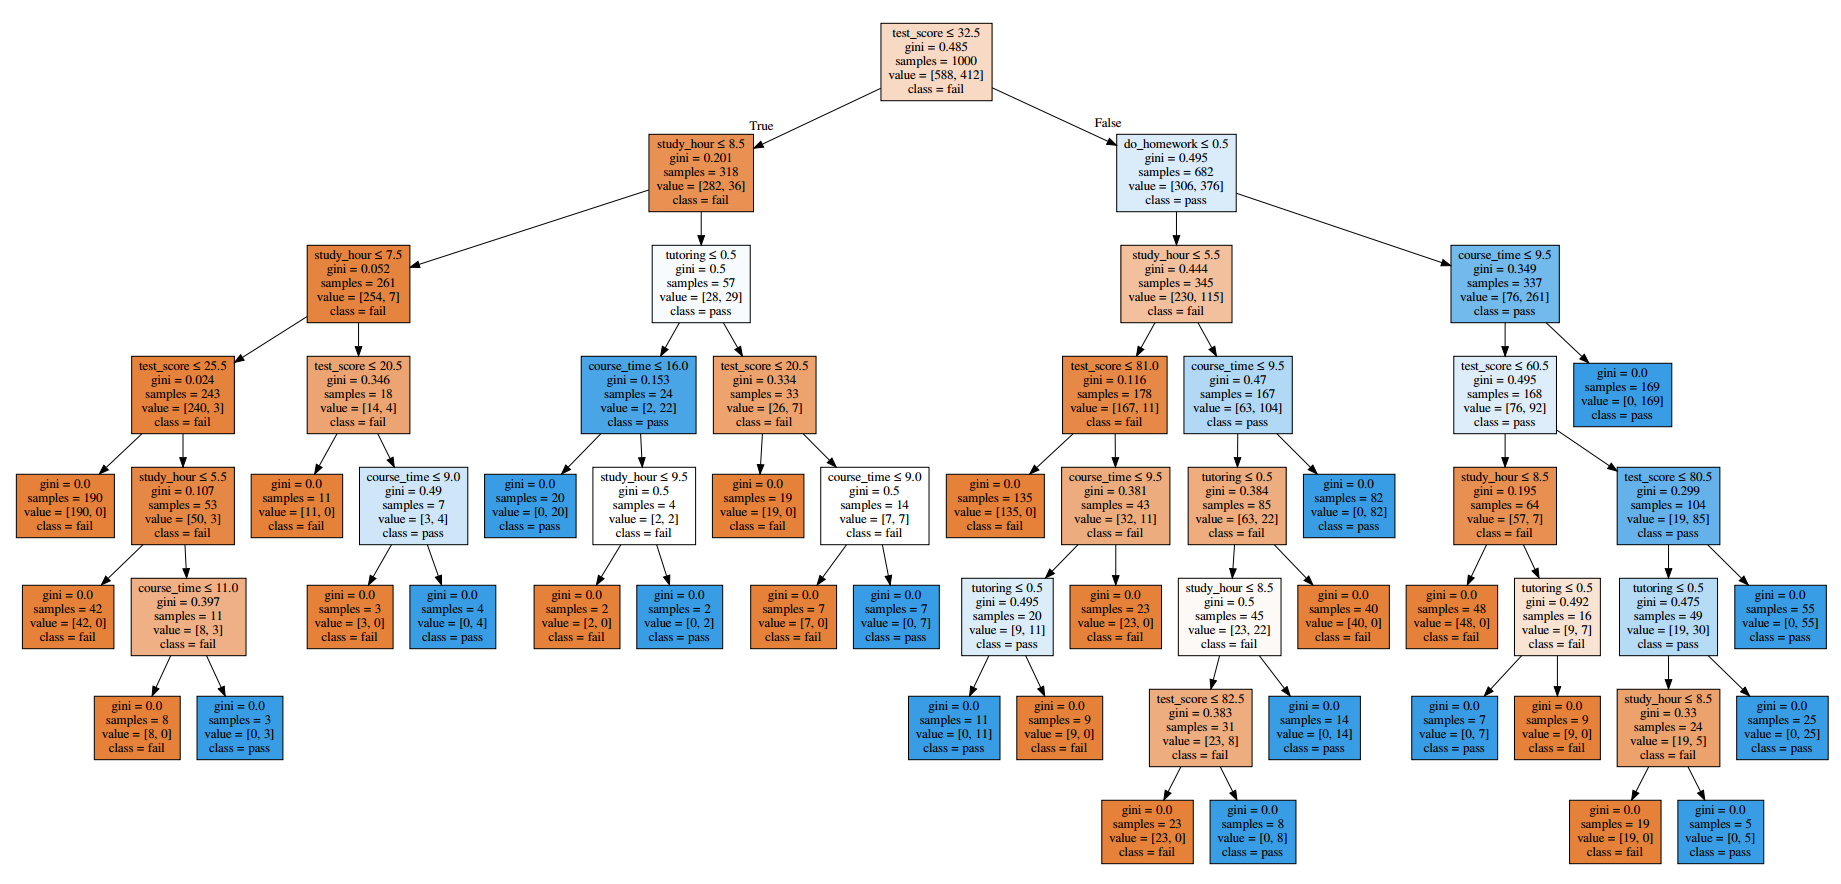

In [ ]:
# 利用資料訓練decision tree
dtree_complicate = DecisionTreeClassifier(max_depth=7)
dtree_complicate.fit(train_x_complicate, train_y_complicate)

dot_data = StringIO()

# 畫出decision tree
export_graphviz(dtree_complicate,
    out_file=dot_data,
    filled=True,
    feature_names=list(train_x_complicate),
    class_names=['fail', 'pass'],
    special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_pdf('decision_tree_complicate.pdf')

# 用其他資料驗證decision tree準確率
rule較複雜時model出來的tree具有誤差，說明錯誤解讀部份attribute

In [ ]:
# 利用decision tree 預測
dt_predict = dtree_complicate.predict(test_x_complicate)
accuracy_score(dt_predict, test_y_complicate)